In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

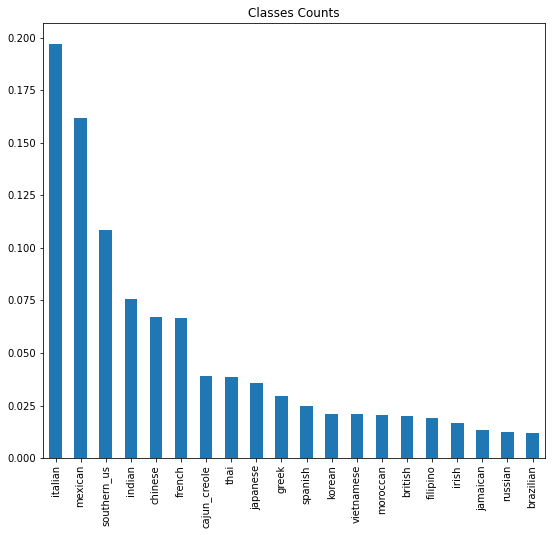

In [28]:
plt.figure(figsize=(9, 8))
train.cuisine.value_counts(normalize=True).plot.bar(title='Classes Counts')
plt.show()

In [29]:
train['ingredients'].str.len().max()

65

In [30]:
train['ingredients'].str.len().min()

1

In [31]:
train.ingredients=train.ingredients.apply(lambda x: ' '.join([str(e).replace(' ', '') for e in x]))

In [32]:
train.ingredients 

0        romainelettuce blackolives grapetomatoes garli...
1        plainflour groundpepper salt tomatoes groundbl...
2        eggs pepper salt mayonaise cookingoil greenchi...
3                            water vegetableoil wheat salt
4        blackpepper shallots cornflour cayennepepper o...
                               ...                        
39769    lightbrownsugar granulatedsugar butter warmwat...
39770    KRAFTZestyItalianDressing purpleonion broccoli...
39771    eggs citrusfruit raisins sourdoughstarter flou...
39772    bonelesschickenskinlessthigh mincedgarlic stea...
39773    greenchile jalapenochilies onions groundblackp...
Name: ingredients, Length: 39774, dtype: object

In [33]:
cv = TfidfVectorizer(max_df=0.99, min_df=0.001, ngram_range=(1,1))
df = cv.fit_transform(train.ingredients)
df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X = df
y = train.cuisine.values
y

array(['greek', 'southern_us', 'filipino', ..., 'irish', 'chinese',
       'mexican'], dtype=object)

In [35]:
logicRegression = LogisticRegression(multi_class='ovr')

In [36]:
logicRegression.fit(X, y)

LogisticRegression(multi_class='ovr')

In [37]:
y_pred = logicRegression.predict(X)
y_pred

array(['greek', 'southern_us', 'filipino', ..., 'british', 'chinese',
       'mexican'], dtype=object)

In [38]:
logicRegression.predict_proba(X)[:, 1]

array([0.00443708, 0.04482342, 0.0069959 , ..., 0.2782498 , 0.00649593,
       0.00129377])

In [39]:
metrics.accuracy_score(y, y_pred)

0.7837532056117061

In [40]:
metrics.f1_score(y, y_pred, average='micro')

0.7837532056117061

In [41]:
metrics.f1_score(y, y_pred, average='macro')

0.700302717411496

In [42]:
metrics.f1_score(y, y_pred, average='weighted')

0.7758220694195407